In [31]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import FunctionTransformer

In [32]:
dataset = pd.read_csv(r'C:\Users\princ\OneDrive\2025\Machine Learning\data\loan_sanction_train.csv')

In [33]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

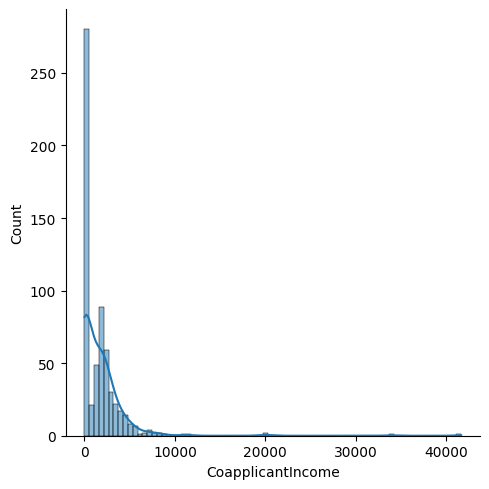

In [34]:
sns.displot(dataset['CoapplicantIncome'], kde = True)
plt.show()

In [35]:
#removing outliers from dataset["CoapplicantIncome"]
q1 = dataset['CoapplicantIncome'].quantile(0.25)
q3 = dataset['CoapplicantIncome'].quantile(0.75)

In [36]:
IQR= q3 - q1

In [37]:
Min_range = q1 - 1.5*IQR
Max_range = q3 + 1.5*IQR

In [38]:
Min_range , Max_range 

(np.float64(-3445.875), np.float64(5743.125))

In [39]:
dataset["CoapplicantIncome_ss"] =pd.DataFrame( dataset["CoapplicantIncome"]<= Max_range)

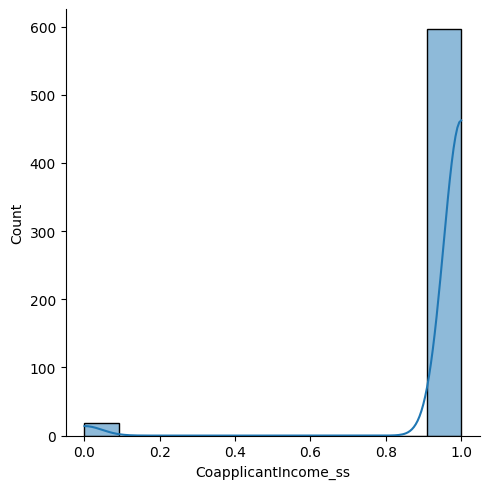

In [40]:
sns.displot(dataset['CoapplicantIncome_ss'], kde = True)
plt.show()


In [41]:
ft = FunctionTransformer(np.log1p)

In [42]:
ft.fit(dataset[["CoapplicantIncome"]])  

FunctionTransformer(func=<ufunc 'log1p'>)

In [45]:
dataset["CoapplicantIncome_ft"]= pd.DataFrame(ft.transform(dataset[["CoapplicantIncome"]]))

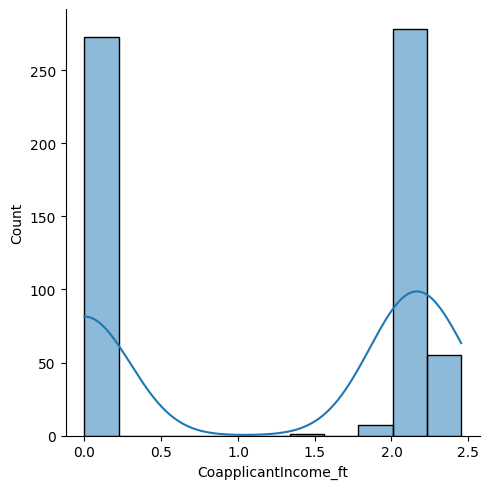

In [46]:
sns.displot(dataset['CoapplicantIncome_ft'], kde =True)
plt.show()